In [2]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
# import matplotlib.pyplot as plt

# # Set default figure size
# plt.rcParams['figure.figsize'] = (6, 4)  # width, height in inches

# # Set default font sizes
# plt.rcParams['font.size'] = 15  # Default font size
# plt.rcParams['axes.titlesize'] = 15  # Title font size
# plt.rcParams['axes.labelsize'] = 15  # Label font size
# plt.rcParams['xtick.labelsize'] = 15  # x-axis tick label font size
# plt.rcParams['ytick.labelsize'] = 15  # y-axis tick label font size
# plt.rcParams['legend.fontsize'] = 15  # Legend font size
# mpl.rcParams['image.cmap'] = 'Greys'
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False

In [3]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

In [4]:

figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_loc_amp_drift'
misc.get_or_create_subdir(figdir)
suppfigdir =misc.get_or_create_subdir(figdir,'supp')
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)


'/mnt/home/szheng/ceph/place_variability/data/paper'

In [5]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [6]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
occu_map_all = prepped_data_agg['occu_map_all']
fr_map_all = prepped_data_agg['fr_map_all']

pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all_test = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all_test = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

pf_params_all = prepped_data_agg['pf_params_all']
all_fields_all = prepped_data_agg['all_fields_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 



In [19]:
spk_beh_df=spk_beh_df_all.loc[(ani,sess),:]

/tmp/ipykernel_1346286/2171042213.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  spk_beh_df=spk_beh_df_all.loc[('e13_26m1','e13_26m1_210913'),:]


In [47]:
subdb

data_dir_full  \
animal_name                                                        
e13_26m1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e15_13f1    0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
e13_26m1    1  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e13_16f1    7  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e13_26m1    2  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e16_3m2     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e16_3m1     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e16_3m2     0  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_26m1    3  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e16_3m1     2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_16f1    8  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e16_3m1     1  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_16f1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_10m1    5  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
            6  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e13_16f1    2  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_9f1     4  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e14_2m2     2  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e13_16f1    5  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            6  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_10m1    3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e14_2m2     1  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e16_1f1     9  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
            5  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e15_9f1     3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e14_2m3     5  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e16_1f1     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e14_2m3     7  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            6  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e15_9f1     5  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e16_1f1     6  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e15_9f1     2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e16_2m1     2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m...   
e15_10m1    4  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e15_9f1     0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e14_2m3     3  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   

                     sess_name animal_name.1        date  \
animal_name                                                
e13_26m1    0  e13_26m1_210913      e13_26m1  2021-09-13   
e15_13f1    0  e15_13f1_220117      e15_13f1  2022-01-17   
            1  e15_13f1_220118      e15_13f1  2022-01-18   
            2  e15_13f1_220119      e15_13f1  2022-01-19   
            3  e15_13f1_220120      e15_13f1  2022-01-20   
e13_26m1    1  e13_26m1_211019      e13_26m1  2021-10-19   
e13_16f1    7  e13_16f1_210328      e13_16f1  2021-03-28   
e13_26m1    2  e13_26m1_211116      e13_26m1  2021-11-16   
e16_3m2     3   e16_3m2_211213       e16_3m2  2021-12-13   
            2   e16_3m2_211212       e16_3m2  2021-12-12   
e16_3m1     3   e16_3m1_210203       e16_3m1  2021-02-03   
e16_3m

In [48]:
# ani='e15_13f1'
# sess='e15_13f1_220117'

In [18]:
(best_n_all_test.loc['e13_26m1','e13_26m1_210913',0]>0).mean()

/tmp/ipykernel_1346286/2604784496.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  (best_n_all_test.loc['e13_26m1','e13_26m1_210913',0]>0).mean()


0.39878048780487807

In [76]:


# prepped_data_agg['pf_params_all']=pf_params_all
# prepped_data_agg['all_fields_all']=all_fields_all
# pickle.dump(prepped_data_agg,open(fn_full,'wb'))

In [75]:
# all_fields_all = {}
# pf_params_all = {}
# for k,row in subdb.iterrows():
#     ddf=row['data_dir_full']
#     sess=row['sess_name']
#     ani = row['animal_name.1']
#     pf_res = pf.field_detection_avg_wrapper(ddf, dosave=False,force_reload=False, load_only=True,
#                                             save_fn='place_field_afterheadscan.p',
#                                             shuffle_fn='frmap_null_afterheadscan.p',
#                                            )
#     all_fields = pd.concat(pf_res['all_fields'],axis=0)
#     pf_params = pd.concat(pf_res['params'],axis=0)
#     pf_params_all[ani,sess] = pf_params
#     all_fields_all[ani,sess] = all_fields
# pf_params_all = pd.concat(pf_params_all,axis=0)
# all_fields_all = pd.concat(all_fields_all,axis=0)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/

In [7]:
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
# pickle.dump(per_field_metrics_all,open(savefn_full,'wb'))
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

In [7]:
def get_val_per_lag(mat):
    '''
    col: lag
    index: count
    '''
    mat = mat.dropna(axis=1,how='all').dropna(axis=0,how='all')
    mat = mat.values
    ntrials = mat.shape[0]
    vals_per_lag_l = {}
    for lag in range(1,ntrials-1):
        vals_per_lag = np.diag(mat,lag)
        vals_per_lag_l[lag] = pd.Series(vals_per_lag)
    return pd.DataFrame(vals_per_lag_l)


    

# pv decorr

In [10]:
pc_ind_l = []
for ind in all_fields_recombined_all.index:
    if ind[3]=='both':
        pc_ind_l.append((ind[0],ind[1],ind[2],0,ind[4]))
        pc_ind_l.append((ind[0],ind[1],ind[2],1,ind[4]))
    else:
        pc_ind_l.append((ind[0],ind[1],ind[2],ind[3],ind[4]))
pc_ind_l = pd.MultiIndex.from_tuples(pc_ind_l)

In [11]:
# select place cells
fr_map_trial_df_pc = fr_map_trial_df_all.unstack(level=-1).loc[pc_ind_l].stack()

In [12]:
import pv_corr_analysis as pvca

In [13]:
pv_corr_alltrials = fr_map_trial_df_pc.groupby(level=(0,1,2,3)).corr()
gpb_corr_sess=pv_corr_alltrials.groupby(level=(0,1,2,3))
pv_corr_per_lag=gpb_corr_sess.apply(pvca.get_val_per_lag)

#### stats

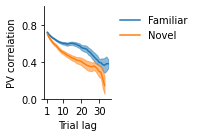

In [14]:
gpb = pv_corr_per_lag.groupby(level=(2))
fig,ax=plt.subplots(figsize=(1.2,1.7))
isfam_d_str={0:'Familiar',1:'Novel'}
color_l = ['C0','C1']
for k,val in gpb:
    c = color_l[k]
    fig,ax=ph.mean_error_plot(val,fig=fig,ax=ax,label=f'{isfam_d_str[k]}',linestyle='-',c=c)
sns.despine()
ax.legend(bbox_to_anchor=[1,1],frameon=False)
ax.set_ylim([0,1])
ax.set_xlabel('Trial lag')
ax.set_ylabel('PV correlation')
ax.set_yticks(np.arange(0,1,0.4))
ax.set_xticks([1,10,20,30])

figfn = 'pv_corr_fam_nov_vs_triallag'
# ph.save_given_name(fig,figfn,figdir)


In [17]:
import pv_corr_analysis as pvca

In [191]:
val

11
e16_3m2 e16_3m2_211213 1 1.0 0   0.490864
                             1   0.409009
                             2        NaN
                             3        NaN
                             4        NaN
                             5        NaN
                             6        NaN
                             7        NaN
                             8        NaN
                             9        NaN
                             10       NaN
                             11       NaN

In [196]:
pv_corr_per_lag.loc[(slice(None),'e13_16f1_210302'),:]

1         2         3         4   \
e13_16f1 e13_16f1_210302 0 0.0 0   0.440308  0.280517  0.312358  0.317034   
                               1   0.634385  0.633516  0.668201  0.659183   
                               2   0.750463  0.671277  0.657403  0.605611   
                               3   0.804998  0.740424  0.705440  0.676328   
                               4   0.782333  0.703285  0.653202  0.652516   
                               5   0.751653  0.665373  0.694934  0.635505   
                               6   0.757832  0.708811  0.683188  0.564548   
                               7   0.738863  0.738176  0.591994  0.675975   
                               8   0.746464  0.695851  0.746688  0.730193   
                               9   0.681223  0.706638  0.724076  0.656826   
                               10  0.727370  0.664429  0.650420  0.662697   
                               11  0.772100  0.725182  0.722630       NaN   
                               12  0.765334  0.755993       NaN       NaN   
                               13  0.772380       NaN       NaN       NaN   
                           1.0 0   0.631764  0.673047  0.610827  0.586704   
                               1   0.669339  0.671473  0.537287  0.517167   
                               2   0.723863  0.556921  0.606790  0.562302   
                               3   0.637074  0.672069  0.666478       NaN   
                               4   0.651115  0.678925       NaN       NaN   
                               5   0.641151       NaN       NaN       NaN   

                                         5         6         7         8   \
e13_16f1 e13_16f1_210302 0 0.0 0   0.379951  0.344859  0.331763  0.327123   
                               1   0.608231  0.627339  0.630596  0.612944   
                               2   0.611421  0.635564  0.618775  0.552355   
                               3   0.666090  0.625885  0.593678  0.686397   
                               4   0.617860  0.579829  0.650114  0.609851   
                               5   0.608664  0.673026  0.627023  0.644612   
                               6   0.652232  0.650313  0.659023  0.696192   
                               7   0.692480  0.623034  0.683105       NaN   
                               8   0.643921  0.661191       NaN       NaN   
                               9   0.709223       NaN       NaN       NaN   
                               10       NaN       NaN       NaN       NaN   
                               11       NaN       NaN       NaN       NaN   
                               12       NaN       NaN       NaN       NaN   
                               13       NaN       NaN       NaN       NaN   
                           1.0 0   0.518142       NaN       NaN       NaN   
                               1   0.538692       NaN       NaN       NaN   
                               2        NaN       NaN       NaN       NaN   
                               3        NaN       NaN       NaN       NaN   
                               4        NaN       NaN       NaN       NaN   
                               5        NaN       NaN       NaN       NaN   

                                         9         10  ...  26  27  28  29  \
e13_16f1 e13_16f1_210302 0 0.0 0   0.340532  0.351232  ... NaN NaN NaN NaN   
                               1   0.583713  0.623861  ... NaN NaN NaN NaN   
                               2   0.590770  0.549830  ... NaN NaN NaN NaN   
                               3   0.638606  0.638661  ... NaN NaN NaN NaN   
                               4   0.623344  0.623597  ... NaN NaN NaN NaN   
                               5   0.657763       NaN  ... NaN NaN NaN NaN   
                               6        NaN       NaN  ... NaN NaN NaN NaN   
                               7        NaN       NaN  ... NaN NaN NaN NaN   
                               8        NaN       NaN  ... NaN NaN NaN NaN   
                         

In [210]:
slope_per_sess.loc[(slice(None),slice(None),1)]

e13_26m1  e13_26m1_211019  0.0   -0.009944
          e13_26m1_211119  0.0   -0.026337
                           1.0   -0.020126
e15_13f1  e15_13f1_220118  0.0   -0.009344
                           1.0   -0.005268
          e15_13f1_220119  0.0   -0.021713
          e15_13f1_220120  0.0   -0.023749
                           1.0   -0.006337
e16_3m2   e16_3m2_211212   0.0   -0.027287
                           1.0   -0.013001
dtype: float64

In [213]:
slope_per_sess

e13_26m1  e13_26m1_210913  0  0.0   -0.009377
                              1.0   -0.006843
          e13_26m1_211019  0  0.0   -0.005117
                              1.0   -0.012713
                           1  0.0   -0.009944
          e13_26m1_211119  1  0.0   -0.026337
                              1.0   -0.020126
e14_2m3   e14_2m3_201206   0  0.0   -0.009100
          e14_2m3_201208   0  0.0   -0.005436
                              1.0   -0.003910
e15_13f1  e15_13f1_220117  0  0.0   -0.020287
          e15_13f1_220118  1  0.0   -0.009344
                              1.0   -0.005268
          e15_13f1_220119  0  0.0   -0.013825
                           1  0.0   -0.021713
          e15_13f1_220120  0  0.0   -0.007963
                              1.0   -0.012502
                           1  0.0   -0.023749
                              1.0   -0.006337
e15_9f1   e15_9f1_200720   0  0.0   -0.016793
          e15_9f1_200802   0  0.0   -0.004075
e16_1f1   e16_1f1_200918   0  0.0 

In [214]:
slope_per_sess

e13_26m1  e13_26m1_210913  0  0.0   -0.009377
                              1.0   -0.006843
          e13_26m1_211019  0  0.0   -0.005117
                              1.0   -0.012713
                           1  0.0   -0.009944
          e13_26m1_211119  1  0.0   -0.026337
                              1.0   -0.020126
e14_2m3   e14_2m3_201206   0  0.0   -0.009100
          e14_2m3_201208   0  0.0   -0.005436
                              1.0   -0.003910
e15_13f1  e15_13f1_220117  0  0.0   -0.020287
          e15_13f1_220118  1  0.0   -0.009344
                              1.0   -0.005268
          e15_13f1_220119  0  0.0   -0.013825
                           1  0.0   -0.021713
          e15_13f1_220120  0  0.0   -0.007963
                              1.0   -0.012502
                           1  0.0   -0.023749
                              1.0   -0.006337
e15_9f1   e15_9f1_200720   0  0.0   -0.016793
          e15_9f1_200802   0  0.0   -0.004075
e16_1f1   e16_1f1_200918   0  0.0 

In [215]:
df = slope_per_sess.reset_index(level=2)

In [216]:
df

level_2         0
e13_26m1 e13_26m1_210913 0.0        0 -0.009377
                         1.0        0 -0.006843
         e13_26m1_211019 0.0        0 -0.005117
                         1.0        0 -0.012713
                         0.0        1 -0.009944
         e13_26m1_211119 0.0        1 -0.026337
                         1.0        1 -0.020126
e14_2m3  e14_2m3_201206  0.0        0 -0.009100
         e14_2m3_201208  0.0        0 -0.005436
                         1.0        0 -0.003910
e15_13f1 e15_13f1_220117 0.0        0 -0.020287
         e15_13f1_220118 0.0        1 -0.009344
                         1.0        1 -0.005268
         e15_13f1_220119 0.0        0 -0.013825
                         0.0        1 -0.021713
         e15_13f1_220120 0.0        0 -0.007963
                         1.0        0 -0.012502
                         0.0        1 -0.023749
                         1.0        1 -0.006337
e15_9f1  e15_9f1_200720  0.0        0 -0.016793
         e15_9f1_200802  0.0        0 -0.004075
e16_1f1  e16_1f1_200918  0.0        0 -0.018938
         e16_1f1_200919  0.0        0 -0.011368
e16_3m2  e16_3m2_211212  0.0        1 -0.027287
                         1.0        1 -0.013001
         e16_3m2_211213  1.0        0 -0.016841

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.144e-02 U_stat=8.910e+02
[0 1]; N = 106; Effect size = 0.5863455213379244; wilcoxon rank sum p=0.021176435861773788

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:3.041e-01 U_stat=1.000e+02
[0 1]; N = 26; Effect size = 0.5387941975000654; wilcoxon rank sum p=0.29184054514378843

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:6.857e-01 U_stat=6.000e+00
[0 1]; N = 8; Effect size = -0.3584

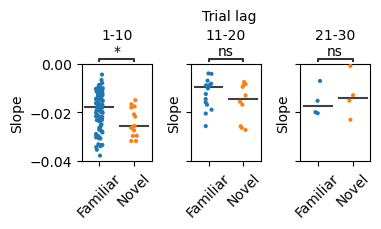

In [258]:
reload(ph)
reload(misc)
import statannotations
from statannotations.Annotator import Annotator

gpb = pv_corr_per_lag.groupby(level=(0,1,2,3))
st=0
# ed=5
min_len_comparison=5
# st_l = [0,5,10]
st_l = [0,10,20]

fig,axs=plt.subplots(1,3,figsize=(1.3*len(st_l),2.5),sharey=True)
for ii,st in enumerate(st_l):
    ax=axs[ii]
    ax.set_ylim([-0.04,0])
    ed = st+10
    slope_per_sess={}
    for k,val in gpb:
        val = val.iloc[:,st:ed].dropna(axis=1,how='all')
        min_len = min((ed-st),min_len_comparison)
        if val.shape[1] >= min_len:
            slope_one = pvca.get_decay_slope_linregress(val)
            slope_per_sess[k] = slope_one
    slope_per_sess = pd.Series(slope_per_sess)


#     df=slope_per_sess.unstack(2).dropna()
    df = slope_per_sess.reset_index(level=2)
    df.columns=['Isnovel','Slope']

    # df=slope_per_sess.unstack(2)
#     df=df.rename({0:'Familiar',1:'Novel'},axis=1)
    palette = {'Familiar':'C0','Novel':'C1'}
#     fig,ax=ph.paired_line_with_box(df,'Familiar','Novel',fig=fig,ax=ax,dotest=True,palette=palette)
    ph.median_plot(data=df,x='Isnovel',y='Slope',ax=ax)
    sns.stripplot(data=df,x='Isnovel',y='Slope',ax=ax,s=3)
    annotator = Annotator(ax, pairs=[[0,1]], x='Isnovel', y='Slope',data=df)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    ax.set_title(f'{st+1}-{ed}',pad=18)
#     xx=df['Novel'] - df['Familiar']
#     misc.print_stats_onevar(xx)
    ax.set_xticklabels(['Familiar','Novel'],rotation=45)
    ax.set_xlabel('')
    misc.print_stats_twovar(df,'Isnovel','Slope')
axs[0].set_ylabel('Slope')
tit=fig.suptitle('Trial lag',fontsize=10)
tit.set_position([0.6,0.9])
plt.tight_layout()
fn = 'pvcorr_slope_fam_vs_novel'
ph.save_given_name(fig,fn,figdir)

In [259]:
df

Isnovel     Slope
e13_26m1 e13_26m1_210913 0.0        0 -0.019949
                         1.0        0 -0.015240
         e13_26m1_211019 0.0        0 -0.007019
         e13_26m1_211119 0.0        1 -0.012921
                         1.0        1 -0.000803
e15_13f1 e15_13f1_220118 0.0        1 -0.015166
                         1.0        1 -0.023075
         e15_13f1_220120 0.0        0 -0.020386

In [245]:
df.groupby('Isnovel')

# rate vs location; corr and euc distance vs trial; 

In [ ]:
# pf_key = 'fr_peak'
# fig,axs=plt.subplots(2,2,figsize=(10,12))
fig,axs=plt.subplots(1,2,figsize=(10,6))
sns.despine()
dist = 'corr'
# for ii,pf_key in enumerate(['fr_peak','peak','fr_mean','com']):
for ii,pf_key in enumerate(['fr_peak','peak']):
    
plt.tight_layout()
    

In [42]:
### tentatively trying stats ####

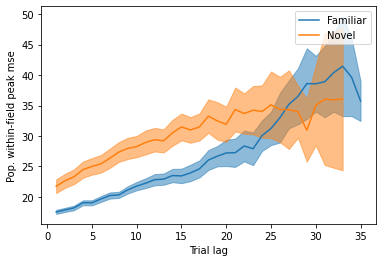

In [40]:
dist = 'mse'
fig,ax,pf_key_mse_allsess = pvca.get_plot_pf_param_population_corr_vs_lag(pf_params_all,ma_ind_new=None,pf_key='peak',fig=None,ax=None,center_cell=False,zscore_cell=False,dist=dist)



In [32]:
import statsmodels.formula.api as smf


In [41]:
isnovel = 0
df=pf_key_mse_allsess.loc[(slice(None),slice(None),isnovel)].median().reset_index()
df.columns=['trial','corr']
res=smf.ols('corr~trial',data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   corr   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     80.46
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           1.35e-10
Time:                        05:31:19   Log-Likelihood:                -75.272
No. Observations:                  37   AIC:                             154.5
Df Residuals:                      35   BIC:                             157.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.4056      0.613     26.758      0.000      15.161      17.650
trial          0.2628      0.029      8.970      0.000       0.203       0.322
==============================================================================
Omnibus:                       18.182   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.722
Skew:                           1.498   Prob(JB):                     1.16e-05
Kurtosis:                       5.400   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### tentatively trying stats #### (end)

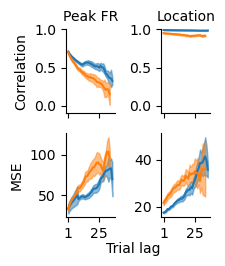

In [149]:
reload(pvca)
# pf_key = 'fr_peak'
fig,axs=plt.subplots(2,2,figsize=(2.3,2.9),sharex=True)
sns.despine()
dist = 'mse'
for ii,pf_key in enumerate(['fr_peak','peak']):
    ax=axs[0,ii]
    fig,ax,pf_key_corr_allsess = pvca.get_plot_pf_param_population_corr_vs_lag(pf_params_all,ma_ind_new=None,pf_key=pf_key,fig=fig,ax=ax,center_cell=False,zscore_cell=False,dist='corr')
    ax.set_ylim([-0.1,1.])
    ax.legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')
        
    ax=axs[1,ii]
    #     fig,ax,pf_key_corr_allsess = pvca.get_plot_pf_param_population_corr_vs_lag(pf_params_all,ma_ind_new=None,pf_key=pf_key,fig=fig,ax=ax,center_cell=False,zscore_cell=True,dist=dist)
    fig,ax,pf_key_mse_allsess = pvca.get_plot_pf_param_population_corr_vs_lag(pf_params_all,ma_ind_new=None,pf_key=pf_key,fig=fig,ax=ax,center_cell=False,zscore_cell=False,dist='mse')
    ax.legend().remove()
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    
axs[0,0].set_title('Peak FR')
axs[0,1].set_title('Location')
axs[0,0].set_ylabel('Correlation')
axs[1,0].set_ylabel('MSE')

axs[1,0].set_xticks([1,25])
axs[0,1].set_xticks([1,25])
sxl=fig.supxlabel('Trial lag',fontsize=10)
sxl.set_position((0.6,0.1))



plt.tight_layout()
figfn = f'corr_and_mse_vs_triallag'
# ph.save_given_name(fig,figfn,figdir)

    

# schematic for peak and rate and PV vector

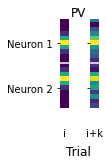

In [100]:
### PV vector
n_pos = 10
pos_l = np.arange(n_pos)
n1 = scipy.stats.norm.pdf(pos_l,loc=n_pos//2)
n2 = scipy.stats.norm.pdf(pos_l,loc=3)
n_tr_1 = np.concatenate([n1,n2])
fig,axs=plt.subplots(1,2,figsize=(1,1.65))
ax=axs[0]
ax.imshow(n_tr_1[:,None],aspect=0.5)

yticks = [n_pos-1+0.5]
ax.set_yticks(yticks)
ax.set_xticks([])
ax.set_xlabel('i',labelpad=20)
ax.axhline(n_pos-0.5,color='white')
xticks = (n_pos//2,n_pos//2+n_pos)
ax.set_yticks(xticks)
ax.set_yticklabels(['Neuron 1','Neuron 2'])
sns.despine(left=True,bottom=True)

ax=axs[1]
n1 = scipy.stats.norm.pdf(pos_l,loc=n_pos//2-1)
n2 = scipy.stats.norm.pdf(pos_l,loc=3+1)
# n_tr_2 = np.concatenate([n1,n2])+np.random.normal(size=n_tr_1.shape) * 0.1
n_tr_2 = n_tr_1+np.random.normal(size=n_tr_1.shape) * 0.1

ax.imshow(n_tr_2[:,None],aspect=0.5)
yticks = [n_pos-1+0.5]
ax.set_yticks(yticks)
ax.set_xticks([])
xlabel=ax.set_xlabel('i+k',labelpad=20)

ax.axhline(n_pos-0.5,color='white')
xticks = (n_pos//2,n_pos//2+n_pos)
ax.set_yticks(xticks)
ax.set_yticklabels(['',''])
sns.despine(left=True,bottom=True)
# ax.set_yticklabels(['Neuron 1','Neuron 2'])

supx=fig.supxlabel('Trial')
supx.set_position([0.5,-0.3])
fig.suptitle('PV')
figfn = 'PV_schematic'
ph.save_given_name(fig,figfn,figdir)


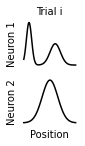

In [103]:
### peak and location vector
n_pos = 100
pos_l = np.arange(n_pos)
n1 = scipy.stats.norm.pdf(pos_l,loc=10,scale=5) + scipy.stats.norm.pdf(pos_l,loc=60,scale=10)
n2 = scipy.stats.norm.pdf(pos_l,loc=50,scale=15)

fig,axs=plt.subplots(2,1,figsize=(1.5,2),sharex=True)
ax=axs[0]
ax.plot(n1,c='k')
ax.set_xticks([])
ax.set_title('Trial i')
ax.set_yticks([])
ax.set_ylabel('Neuron 1')

ax=axs[1]
ax.plot(n2,c='k')

sns.despine(left=True,right=True,top=True,bottom=True)
plt.tight_layout()
ax.set_xlabel('Position')
ax.set_yticks([])
ax.set_ylabel('Neuron 2')

figfn='rate_and_location_vector_schematic'
ph.save_given_name(fig,figfn,figdir)


In [12]:
n_tr_1

array([0.05399097, 0.24197072, 0.39894228, 0.24197072, 0.05399097,
       0.24197072, 0.39894228, 0.24197072, 0.05399097, 0.00443185])

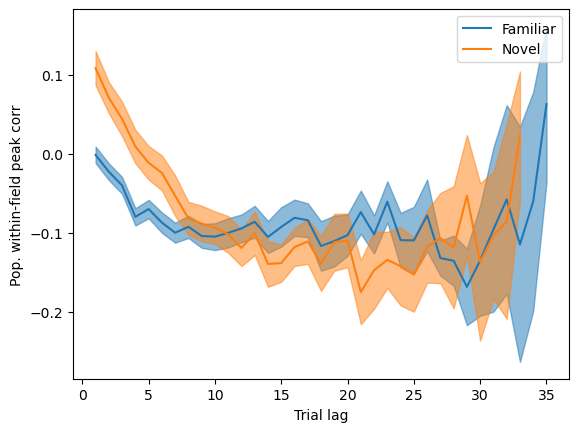

In [153]:
# center the pos doesn't give anything useful; change across cells do not have much order to be preserved
fig,ax,pf_key_corr_allsess = pvca.get_plot_pf_param_population_corr_vs_lag(pf_params_all,ma_ind_new=None,pf_key=pf_key,fig=None,ax=None,center_cell=True,zscore_cell=False,dist='corr')



In [164]:
# example of relatively stable corr, with drifting euclidean distance 
aa = np.array([[10,50,90],
               [11,49,91],
               [15,55,96],
               [17,57,97]
              ]
             )

print(np.corrcoef(aa))

from scipy.spatial.distance import pdist,squareform
print(squareform(pdist(aa)))


[[1.         0.99958359 0.9999746  1.        ]
 [0.99958359 1.         0.99976387 0.99958359]
 [0.9999746  0.99976387 1.         0.9999746 ]
 [1.         0.99958359 0.9999746  1.        ]]
[[ 0.          1.73205081  9.2736185  12.12435565]
 [ 1.73205081  0.          8.77496439 11.66190379]
 [ 9.2736185   8.77496439  0.          3.        ]
 [12.12435565 11.66190379  3.          0.        ]]


# schematic for different ways things can drift

In [ ]:
fig,ax=gen_sim_plot(jitter=5.3,modulation=1)
figfn = 'schematic_pos_induced_decorrelation'
# ph.save_given_name(fig,figfn,figdir=figdir)

fig,ax=gen_sim_plot(jitter=0,modulation=0.05)
figfn = 'schematic_rate_induced_decorrelation'
# ph.save_given_name(fig,figfn,figdir=figdir)


# pv seperate into place and nonplace cell

In [233]:
exclude_sess_ma = fr_map_trial_df_all.index.get_level_values(1)!='e13_26m1_210913'

In [235]:
exclude_sess_ma

array([False, False, False, ...,  True,  True,  True])

In [9]:
# look at nice place cells
per_neuron_metrics_all = per_field_metrics_all.groupby(level=(0,1,2,4)).max()
ma = per_neuron_metrics_all['si'] > 0.5

# fr_map_trial_df_all_ = fr_map_trial_df_all.loc[exclude_sess_ma].unstack(level=(-1,-3))
fr_map_trial_df_all_ = fr_map_trial_df_all.unstack(level=(-1,-3))
hi_si_ind = ma.loc[ma].index.intersection(fr_map_trial_df_all_.index)
low_si_ind=ma.loc[~ma].index.intersection(fr_map_trial_df_all_.index)

fr_map_trial_df_all_highsi=fr_map_trial_df_all_.loc[hi_si_ind].stack(level=(-2,-1)).reorder_levels((0,1,2,5,3,4))
fr_map_trial_df_all_lowsi=fr_map_trial_df_all_.loc[low_si_ind].stack(level=(-2,-1)).reorder_levels((0,1,2,5,3,4))

reorder = lambda df:df.groupby(level=(0,1,2)).apply(lambda x:x.sort_index(level=(3,4,5)).droplevel(level=(0,1,2)))
fr_map_trial_df_all_highsi = reorder(fr_map_trial_df_all_highsi)
fr_map_trial_df_all_lowsi = reorder(fr_map_trial_df_all_lowsi)

In [30]:
# pc_inds=all_fields_all.reset_index('field_index').index.unique()


# all_inds = fr_map_trial_df_all.unstack(level=(-1)).index

# non_pc_inds = all_inds.difference(pc_inds).unique()

# fr_map_trial_df_all_highsi = fr_map_trial_df_all.unstack(level=(-1)).loc[pc_inds].stack(-1)

# fr_map_trial_df_all_lowsi = fr_map_trial_df_all.unstack(level=(-1)).loc[non_pc_inds].stack(-1)

In [16]:
reload(ph)

<module 'plot_helper' from '/mnt/home/szheng/projects/util_code/plot_helper.py'>

In [10]:
sns.set_context('poster')

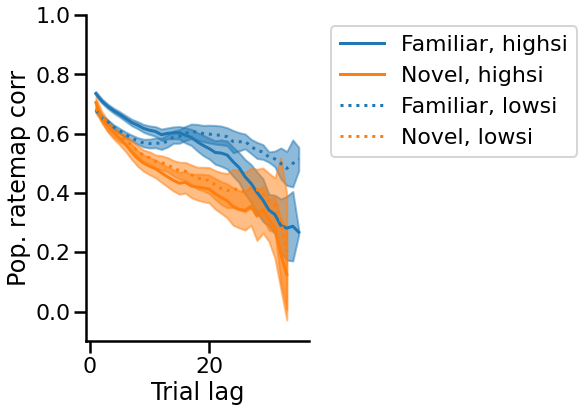

In [11]:
df_d = {'highsi':fr_map_trial_df_all_highsi,'lowsi':fr_map_trial_df_all_lowsi}
pv_corr_per_lag_d={}
fig,ax=plt.subplots(figsize=(4,6))
color_l = ['C0','C1']
linestyle_l={'highsi':'-','lowsi':':'}
for ksi,df in df_d.items():
    gpb_sess=df.groupby(level=(0,1,2,3))
    pv_corr_alltrials = gpb_sess.corr()
    gpb_corr_sess=pv_corr_alltrials.groupby(level=(0,1,2,3))
    pv_corr_per_lag=gpb_corr_sess.apply(get_val_per_lag)
    pv_corr_per_lag_d[ksi]=pv_corr_per_lag
    gpb_task = pv_corr_per_lag.groupby(level=(2))
#     fig,ax=plt.subplots()
    isfam_d_str = {0:'Familiar',1:'Novel'}
    
    for k,val in gpb_task:
        c = color_l[k]
        linestyle = linestyle_l[ksi]
        
        fig,ax=ph.mean_error_plot(val,fig=fig,ax=ax,label=f'{isfam_d_str[k]}, {ksi}',linestyle=linestyle,c=c)
        ax.set(xlabel='Trial lag',ylabel='Pop. ratemap corr')
    ax.legend(bbox_to_anchor=[1.05,1])
#     ax.set_title(ksi)
ax.set_ylim([-0.1,1.])

sns.despine()
for fmt in ['png','svg']:
    figfn = os.path.join(figdir,f'pv_corr_fam_nov_highlow_si_vs_triallag.{fmt}')
#     figfn = os.path.join(figdir,f'pv_corr_fam_nov_highlow_si_vs_triallag_exclude_longestsess.{fmt}')
    fig.savefig(figfn,bbox_inches='tight')

In [130]:
for q in [0,0.2,0.4,0.6,0.8,1]:
    print(per_neuron_metrics_all_tt['tot_var_norm'].quantile(q))

0.019379490726192976
1.0061541656979818
1.561433343326746
2.307704271863884
3.6727715294262464
123.83407000007219


In [229]:
# ma_ind=per_neuron_metrics_all.query('si>0.5&fit_var_ratio>0.4').index
# ma_ind=per_neuron_metrics_all.query('fit_var_ratio>0.3').index

per_neuron_metrics_all_tt=per_field_metrics_all.groupby(level=(0,1,2,3,4),sort=False).mean()
# ma_ind=per_neuron_metrics_all_tt.query('fit_var_ratio>0.01').index
# ma_ind=per_neuron_metrics_all_tt.query('fit_var_ratio<0.01 & fr_cv_beh > 0.95').index

# ma_ind=per_neuron_metrics_all_tt.query('fit_var_ratio>0.01 & fr_cv_beh < 0.58').index
# ma_ind_not=per_neuron_metrics_all_tt.query('fit_var_ratio<0.01 & fr_cv_beh < 0.58').index

ma_ind=per_neuron_metrics_all_tt.query('fit_var_ratio>0.01 & fr_cv_beh > 0.58').index
ma_ind_not=per_neuron_metrics_all_tt.query('fit_var_ratio>0.01 & fr_cv_beh < 0.58').index

# ma_ind=per_neuron_metrics_all_tt.query('fit_var_ratio>0.01 & tot_var_norm > 3.6 & tot_var_norm < 10').index
# ma_ind_not=per_neuron_metrics_all_tt.query('fit_var_ratio<0.01 & tot_var_norm > 3.6 & tot_var_norm < 10').index

ma_ind=per_neuron_metrics_all_tt.query('mean>5.9&si>0.5').index
ma_ind_not=per_neuron_metrics_all_tt.query('mean>5.9&si<0.5').index


# get rid of "both", replace with a copy with 0 and 1
def replace_both_in_ma_ind(ma_ind):
    ma_ind_new=[]
    for ind in ma_ind:
        if ind[3]=='both':
            ma_ind_new.append((*ind[:3],0,*ind[4:]))
            ma_ind_new.append((*ind[:3],1,*ind[4:]))
        else:
            ma_ind_new.append(ind)
    ma_ind_new = pd.MultiIndex.from_tuples(ma_ind_new)
    return ma_ind_new

ma_ind_new = replace_both_in_ma_ind(ma_ind)
ma_ind_new_not = replace_both_in_ma_ind(ma_ind_not)

In [230]:
fr_map_trial_df_all_reset = fr_map_trial_df_all.reset_index(level=5)
# ma_ind_new_not=fr_map_trial_df_all_reset.index.difference(ma_ind_new)
fr_map_trial_df_all_sw = fr_map_trial_df_all_reset.loc[ma_ind_new].set_index('level_5',append=True)
fr_map_trial_df_all_nosw = fr_map_trial_df_all_reset.loc[ma_ind_new_not].set_index('level_5',append=True)


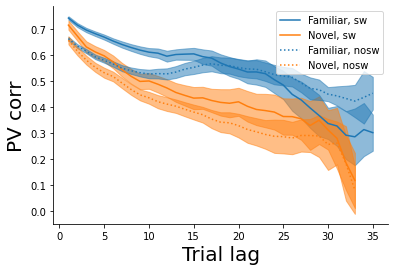

In [251]:
df_d = {'sw':fr_map_trial_df_all_sw,'nosw':fr_map_trial_df_all_nosw}
pv_corr_per_lag_d={}
fig,ax=plt.subplots()
color_l = ['C0','C1']
linestyle_l={'sw':'-','nosw':':'}
do_zscore = False#True
for ksi,df in df_d.items():
    if do_zscore:
        df=df.groupby(level=(0,1,2,3,4)).apply(lambda x:(x - np.nanmean(x,axis=(0,1)))/(1e-10+np.nanstd(x,axis=(0,1))))
    
    gpb_sess=df.groupby(level=(0,1,2,3))
    pv_corr_alltrials = gpb_sess.corr()
    gpb_corr_sess=pv_corr_alltrials.groupby(level=(0,1,2,3))
    pv_corr_per_lag=gpb_corr_sess.apply(get_val_per_lag)
    pv_corr_per_lag_d[ksi]=pv_corr_per_lag
    gpb_task = pv_corr_per_lag.groupby(level=(2))
#     fig,ax=plt.subplots()
    isfam_d_str = {0:'Familiar',1:'Novel'}
    
    for k,val in gpb_task:
        c = color_l[k]
        linestyle = linestyle_l[ksi]
        
        fig,ax=ph.mean_error_plot(val,fig=fig,ax=ax,label=f'{isfam_d_str[k]}, {ksi}',linestyle=linestyle,c=c)
        ax.set(xlabel='Trial lag',ylabel='PV corr')
    ax.legend(bbox_to_anchor=[1.05,1.])
#     ax.set_title(ksi)

sns.despine()
# for fmt in ['png','svg']:
#     figfn = os.path.join(figdir,f'pv_corr_fam_nov_highlow_si_vs_triallag_upperhalfFR.{fmt}')
#     fig.savefig(figfn,bbox_inches='tight')

In [215]:
nneuron=100
x_start = np.random.normal(size=(nneuron))
step_std=1
T=20
x_l = [x_start]
diff_direction = np.random.normal(size=(nneuron)) * 0
for i in range(T):
#     x_next = x_l[-1] + np.random.normal(size=(nneuron)) * step_std + diff_direction
    x_next = np.random.normal(size=(nneuron)) * step_std
    x_l.append(x_next)
x_l = np.stack(x_l,axis=0)
x_l.shape
 

(21, 100)

(-0.2, 1.1)

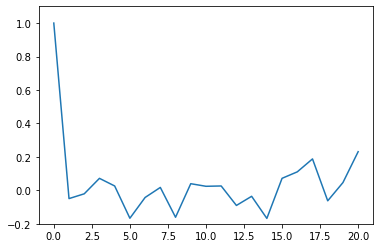

In [220]:
plt.plot(np.corrcoef(x_l)[0])
plt.ylim([-0.2,1.1])

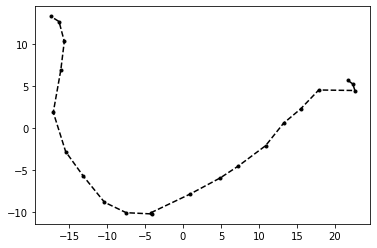

In [197]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pc=pca.fit_transform(x_l)
fig,ax=plt.subplots()
ax.plot(x_pc[:,0],x_pc[:,1],'k--',marker='o',ms=3)


In [34]:
fr_map_trial_df_all.loc[ma_ind_new]

ValueError: operands could not be broadcast together with shapes (2421,4) (6,) (2421,4) 

In [24]:
best_n_all_test

e13_26m1  e13_26m1_210913  0  0.0   3   0    1
                                    27  0    0
                                    29  0    3
                                        1    0
                                        2    0
                                            ..
e14_2m3   e14_2m3_201118   0  both  30  0    0
                                    32  0    0
                                    38  0    0
                                    47  0    0
                                    53  0    0
Length: 14438, dtype: int64

In [29]:
has_sw_ma = best_n_all_test > 0
has_sw_ma_cell=has_sw_ma.groupby(level=(0,1,2,3,4),sort=False).any()

In [30]:
has_sw_ma_cell

e13_26m1  e13_26m1_210913  0  0.0   3      True
                                    27    False
                                    29     True
                                    30    False
                                    31     True
                                          ...  
e14_2m3   e14_2m3_201118   0  both  30    False
                                    32    False
                                    38    False
                                    47    False
                                    53    False
Length: 10164, dtype: bool

In [23]:
fr_map_trial_df_all_highsi

0         1         2   \
e13_16f1 e13_16f1_210302 0 0.0 12.0  0   0.000000  0.707702  0.978546   
                                     1   0.000000  1.086691  1.408718   
                                     2   0.000000  1.830679  2.162798   
                                     3   0.000000  2.883719  3.024042   
                                     4   0.000000  4.111754  3.742877   
...                                           ...       ...       ...   
e16_3m2  e16_3m2_211213  1 1.0 207.0 71  1.501721  0.000000  1.641610   
                                     72  1.160569  0.000000  1.377616   
                                     73  0.781422  0.000000  1.113937   
                                     74  0.472885  0.000000  0.883765   
                                     75  0.304498  0.000000  0.741196   

                                               3         4         5   \
e13_16f1 e13_16f1_210302 0 0.0 12.0  0   0.700436  0.272510  0.068929   
                                     1   1.018228  0.416853  0.115111   
                                     2   1.659129  0.691757  0.217383   
                                     3   2.667279  1.076733  0.387948   
                                     4   4.140979  1.561435  0.638248   
...                                           ...       ...       ...   
e16_3m2  e16_3m2_211213  1 1.0 207.0 71  0.033349  2.608139  1.111305   
                                     72  0.008593  1.762497  0.796221   
                                     73  0.001769  0.993064  0.488047   
                                     74  0.000304  0.462326  0.258484   
                                     75  0.000000  0.213307  0.142098   

                                               6          7         8   \
e13_16f1 e13_16f1_210302 0 0.0 12.0  0   1.123610   8.176753  0.971016   
                                     1   1.096873   9.432746  1.330805   
                                     2   1.062131  11.863770  2.121210   
                                     3   1.070640  14.898099  3.398358   
                                     4   1.221076  17.436317  5.013933   
...                                           ...        ...       ...   
e16_3m2  e16_3m2_211213  1 1.0 207.0 71  3.194294   1.430057  1.217686   
                                     72  2.340608   0.906930  0.746104   
                                     73  1.443965   0.458718  0.405165   
                                     74  0.754116   0.188549  0.196780   
                                     75  0.404385   0.079424  0.101794   

                                               9   ...  27  28  29  30  31  \
e13_16f1 e13_16f1_210302 0 0.0 12.0  0   1.310587  ... NaN NaN NaN NaN NaN   
                                     1   1.747761  ... NaN NaN NaN NaN NaN   
                                     2   2.501265  ... NaN NaN NaN NaN NaN   
                                     3   3.429588  ... NaN NaN NaN NaN NaN   
                                     4   4.452154  ... NaN NaN NaN NaN NaN   
...                                           ...  ...  ..  ..  ..  ..  ..   
e16_3m2  e16_3m2_211213  1 1.0 207.0 71  3.802053  ... NaN NaN NaN NaN NaN   
                                     72  2.581277  ... NaN NaN NaN NaN NaN   
                                     73  1.434314  ... NaN NaN NaN NaN NaN   
                                     74  0.653717  ... NaN NaN NaN NaN NaN   
                                     75  0.301608  ... NaN NaN NaN NaN NaN   

                                         32  33  34  35  36  
e13_16f1 e13_16f1_210302 0 0.0 12.0  0  NaN NaN NaN NaN NaN  
                                     1  NaN NaN NaN NaN NaN  
                                     2  NaN NaN NaN NaN NaN  
                                     3  NaN NaN NaN NaN NaN  
                                     4  NaN NaN NaN NaN NaN  
...                                      ..  ..  ..  ..  ..  
e16_3m2  e16_3m2_211213  1 1.0 20

# population rate correlation

In [40]:
std_q=pop_rate_vec.std(axis=1).quantile(0.8)

0.7490044486852536

In [406]:
do_zscore=False#True#False# True
eps=1e-10
pop_rate_vec = fr_map_trial_df_all.groupby(level=(0,1,2,3,4)).mean()
if do_zscore:
    std = pop_rate_vec.std(axis=1)
    std_q=std.quantile(0.8)
    std_final = np.maximum(std,std_q)
    pop_rate_vec = (pop_rate_vec - pop_rate_vec.mean(axis=1).values[:,None])/(std_final.values[:,None]+eps)
# pop_rate_vec=fr_map_trial_df_all_highsi.groupby(level=(0,1,2,3,4)).mean()
gpb_sess=pop_rate_vec.groupby(level=(0,1,2,3))

In [230]:
first_second_corr_pv = gpb_sess.apply(first_second_half_corr) 
even_odd_corr_pv = gpb_sess.apply(even_odd_corr)
corr_pv=pd.concat({'even_odd':even_odd_corr_pv,'first_second':first_second_corr_pv},axis=1).dropna(axis=0)

[Text(0, 0.5, 'Population rate corr')]

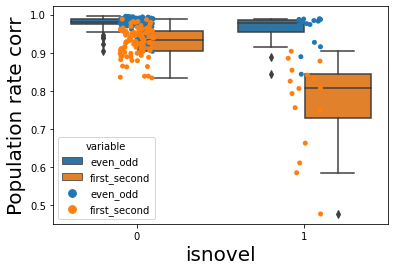

In [231]:
toplot=corr_pv.reset_index(level=2).rename({'level_2':'isnovel',},axis=1).melt(id_vars='isnovel')
fig,ax=plt.subplots()
sns.boxplot(data=toplot,x='isnovel',y='value',hue='variable',ax=ax) # per session
sns.stripplot(data=toplot,x='isnovel',y='value',hue='variable',ax=ax)
# ax.set(ylabel='PV Corr',title='Si > 0.5')
ax.set(ylabel='Population rate corr')


In [407]:
pv_corr_alltrials = gpb_sess.corr()
# pv_corr_alltrials = gpb_sess.apply(dist_one_df)
gpb_corr_sess=pv_corr_alltrials.groupby(level=(0,1,2,3))
pv_corr_per_lag=gpb_corr_sess.apply(get_val_per_lag)

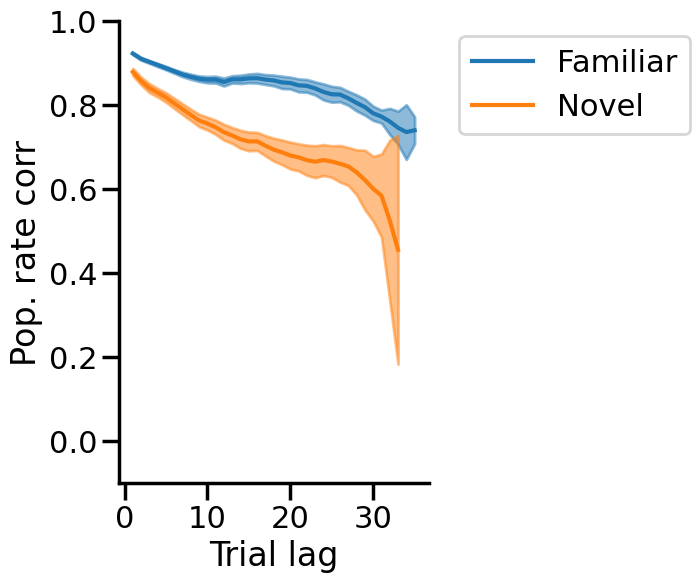

In [408]:
gpb_task=pv_corr_per_lag.groupby(level=(2))
fig,ax=plt.subplots(figsize=(4,6))
isfam_d_str = {0:'Familiar',1:'Novel'}
for k,val in gpb_task:
    fig,ax=ph.mean_error_plot(val,fig=fig,ax=ax,label=isfam_d_str[k],c=f'C{k}')
    ax.set(xlabel='Trial lag',ylabel='Pop. rate corr')
ax.legend(bbox_to_anchor=[1.05,1])
ax.set_ylim([-0.1,1.])
sns.despine()

reload(ph)
figfn = 'pop_rate_corr_vs_triallag'
ph.save_given_name(fig,figfn,figdir=figdir)

In [368]:
sns.set_context('poster')

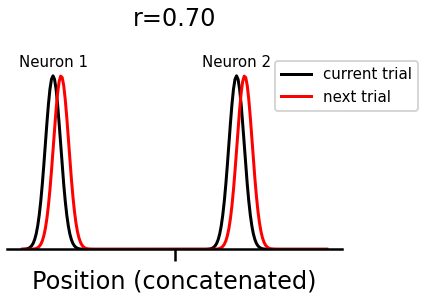

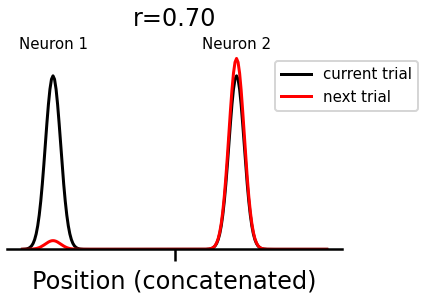

In [51]:
pf_key = 'peak'#'fr_peak'
# pf_key_sub =pf_params_recombined_all.loc[(slice(None),slice(None),pf_key)].loc[ma_ind]
df=pf_params_all.loc[(slice(None),slice(None),slice(None),slice(None),pf_key),:].droplevel(4)
pf_key_sub=df.reset_index(level=-1).loc[ma_ind_new].set_index('level_5',append='True')


In [55]:
pf_key_sub

0     1     2     3     4   \
                                   level_5                                 
e13_16f1 e13_16f1_210302 0 0.0 12  0        28.0  22.0  16.0  15.0  15.0   
                                   1        48.0  58.0  54.0  53.0  53.0   
                               35  0        68.0  59.0  67.0  62.0  60.0   
                               37  0         0.0   0.0   0.0   0.0   0.0   
                                   1        98.0  98.0  98.0  98.0  98.0   
...                                          ...   ...   ...   ...   ...   
e16_3m2  e16_3m2_211213  1 0.0 157 0        17.0  19.0  17.0  19.0  19.0   
                           1.0 157 0        19.0  18.0  17.0  17.0  16.0   
                                   1        44.0  40.0  39.0  39.0  37.0   
                           0.0 190 0        14.0   8.0   6.0  14.0  11.0   
                           1.0 190 0        13.0  12.0   7.0   8.0  15.0   

                                              5     6     7     8     9   ...  \
                                   level_5                                ...   
e13_16f1 e13_16f1_210302 0 0.0 12  0        15.0  18.0  19.0  13.0  11.0  ...   
                                   1        53.0  52.0  52.0  53.0  52.0  ...   
                               35  0        62.0  67.0  65.0  63.0  68.0  ...   
                               37  0         0.0   0.0   0.0   0.0   0.0  ...   
                                   1        98.0  98.0  98.0  98.0  98.0  ...   
...                                          ...   ...   ...   ...   ...  ...   
e16_3m2  e16_3m2_211213  1 0.0 157 0        17.0  18.0  15.0  18.0  18.0  ...   
                           1.0 157 0        18.0  17.0  17.0  15.0  15.0  ...   
                                   1        42.0  41.0  41.0  42.0  43.0  ...   
                           0.0 190 0        12.0   9.0  10.0   6.0  13.0  ...   
                           1.0 190 0         8.0  13.0  13.0  13.0  12.0  ...   

                                            27  28  29  30  31  32  33  34  \
                                   level_5                                   
e13_16f1 e13_16f1_210302 0 0.0 12  0       NaN NaN NaN NaN NaN NaN NaN NaN   
                                   1       NaN NaN NaN NaN NaN NaN NaN NaN   
                               35  0       NaN NaN NaN NaN NaN NaN NaN NaN   
                               37  0       NaN NaN NaN NaN NaN NaN NaN NaN   
                                   1       NaN NaN NaN NaN NaN NaN NaN NaN   
...                                         ..  ..  ..  ..  ..  ..  ..  ..   
e16_3m2  e16_3m2_211213  1 0.0 157 0       NaN NaN NaN NaN NaN NaN NaN NaN   
                           1.0 157 0       NaN NaN NaN NaN NaN NaN NaN NaN   
                                   1       NaN NaN NaN NaN NaN NaN NaN NaN   
                           0.0 190 0       NaN NaN NaN NaN NaN NaN NaN NaN   
                           1.0 190 0       NaN NaN NaN NaN NaN NaN NaN NaN   

                                            35  36  
                                   level_5          
e13_16f1 e13_16f1_210302 0 0.0 12  0       NaN NaN  
                                   1       NaN NaN  
                               35  0       NaN NaN  
                               37  0       NaN NaN  
                                   1       NaN NaN  
...                                         ..  ..  
e16_3m2  e16_3m2_211213  1 0.0 157 0       NaN NaN  
                           1.0 157 0       NaN NaN  
                                   1       NaN NaN  
                           0.0 190 0       NaN NaN  
                           1.0 190 0       NaN NaN  

[10636 rows x 37 columns]

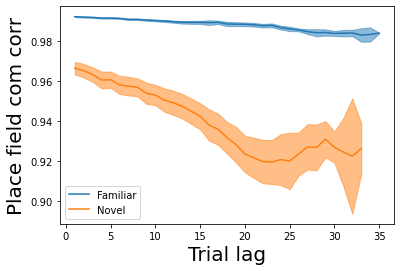

In [218]:
pf_key_corr_allsess = (pf_key_sub).groupby(level=(0,1,2)).corr()
# pf_key_corr_allsess = (pf_key_sub).groupby(level=(0,1,2)).apply(dist_one_df)

gpb_corr_sess=pf_key_corr_allsess.groupby(level=(0,1,2))
pv_corr_per_lag=gpb_corr_sess.apply(get_val_per_lag)
gpb_task=pv_corr_per_lag.groupby(level=(2))
fig,ax=plt.subplots()
isfam_d_str = {0:'Familiar',1:'Novel'}
for k,val in gpb_task:
    fig,ax=ph.mean_error_plot(val,fig=fig,ax=ax,label=isfam_d_str[k],c=f'C{k}')
    ax.set(xlabel='Trial lag',ylabel=f'Place field {pf_key} corr')
ax.legend()

In [414]:
pf_key_corr_allsess

0         1         2         3   \
e13_16f1 e13_16f1_210302 0 0   1.000000  0.615713  1.000000 -1.000000   
                           1   0.615713  1.000000  1.000000 -1.000000   
                           2   1.000000  1.000000  1.000000  0.675616   
                           3  -1.000000 -1.000000  0.675616  1.000000   
                           4   0.039775  0.480255 -1.000000  1.000000   
...                                 ...       ...       ...       ...   
e16_3m2  e16_3m2_211213  1 65       NaN       NaN       NaN       NaN   
                           66       NaN       NaN       NaN       NaN   
                           67       NaN       NaN       NaN       NaN   
                           68       NaN       NaN       NaN       NaN   
                           69       NaN       NaN       NaN       NaN   

                                     4         5         6         7   \
e13_16f1 e13_16f1_210302 0 0   0.039775  1.000000  0.199982  0.232062   
                           1   0.480255  1.000000  0.739279  0.802059   
                           2  -1.000000  0.657335  1.000000  1.000000   
                           3   1.000000  0.680363 -1.000000 -1.000000   
                           4   1.000000 -1.000000  0.773413  0.639934   
...                                 ...       ...       ...       ...   
e16_3m2  e16_3m2_211213  1 65       NaN       NaN       NaN       NaN   
                           66       NaN       NaN       NaN       NaN   
                           67       NaN       NaN       NaN       NaN   
                           68       NaN       NaN       NaN       NaN   
                           69       NaN       NaN       NaN       NaN   

                                     8         9   ...  60  61  62  63  64  \
e13_16f1 e13_16f1_210302 0 0   0.279630  1.000000  ... NaN NaN NaN NaN NaN   
                           1   0.742341  1.000000  ... NaN NaN NaN NaN NaN   
                           2   1.000000  0.405865  ... NaN NaN NaN NaN NaN   
                           3  -1.000000  0.351073  ... NaN NaN NaN NaN NaN   
                           4   0.750433 -1.000000  ... NaN NaN NaN NaN NaN   
...                                 ...       ...  ...  ..  ..  ..  ..  ..   
e16_3m2  e16_3m2_211213  1 65       NaN       NaN  ... NaN NaN NaN NaN NaN   
                           66       NaN       NaN  ... NaN NaN NaN NaN NaN   
                           67       NaN       NaN  ... NaN NaN NaN NaN NaN   
                           68       NaN       NaN  ... NaN NaN NaN NaN NaN   
                           69       NaN       NaN  ... NaN NaN NaN NaN NaN   

                               65  66  67  68  69  
e13_16f1 e13_16f1_210302 0 0  NaN NaN NaN NaN NaN  
                           1  NaN NaN NaN NaN NaN  
                           2  NaN NaN NaN NaN NaN  
                           3  NaN NaN NaN NaN NaN  
                           4  NaN NaN NaN NaN NaN  
...                            ..  ..  ..  ..  ..  
e16_3m2  e16_3m2_211213  1 65 NaN NaN NaN NaN NaN  
                           66 NaN NaN NaN NaN NaN  
                           67 NaN NaN NaN NaN NaN  
                           68 NaN NaN NaN NaN NaN  
                           69 NaN NaN NaN NaN NaN  

[3780 rows x 70 columns]

<Axes: >

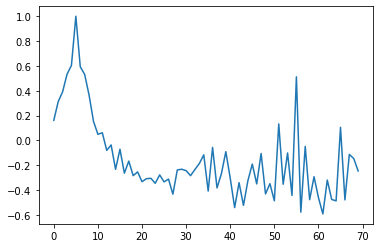

In [411]:
pf_key_corr.loc[5].plot()

In [322]:
wass_d_l

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,20.197759,23.821890,22.982630,19.279621,22.318145,20.247887,21.668078,23.454547,21.902637,...,22.267123,19.008375,19.471179,17.481743,19.152023,17.601058,19.821733,16.931657,19.739896,23.555463
1,20.197759,0.000000,8.720723,8.214246,7.124096,8.564200,7.140474,8.033997,8.313424,5.561409,...,6.005996,5.980166,4.805945,5.107295,6.793874,11.371946,5.757210,10.855212,9.580180,19.999553
2,23.821890,8.720723,0.000000,0.943375,4.754337,1.594851,6.071520,2.859893,0.795764,4.288579,...,9.226379,9.062449,8.920269,6.742732,10.689900,15.966743,5.851482,14.738314,15.080801,25.767415
3,22.982630,8.214246,0.943375,0.000000,3.814171,1.657822,5.758454,2.546826,0.962685,4.369130,...,9.259266,8.749383,8.605414,5.899489,10.376833,15.653676,5.538415,14.425247,14.748346,25.454348
4,19.279621,7.124096,4.754337,3.814171,0.000000,3.651073,3.709070,2.655706,4.310244,5.600643,...,9.883338,7.143413,6.921637,3.681367,8.471025,13.591707,5.110917,12.363278,12.644484,23.392379
5,22.318145,8.564200,1.594851,1.657822,3.651073,0.000000,5.153135,1.825679,2.262066,4.801616,...,9.449075,8.187731,7.959320,5.947884,9.543043,14.819858,4.802412,13.591592,13.928017,24.623313
6,20.247887,7.140474,6.071520,5.758454,3.709070,5.153135,0.000000,3.354808,6.222464,4.076056,...,8.073343,5.061462,5.457070,4.622718,5.651841,9.895239,3.842530,8.836251,9.210266,19.695894
7,21.668078,8.033997,2.859893,2.546826,2.655706,1.825679,3.354808,0.000000,3.010837,4.453599,...,8.997071,6.614826,6.249466,4.925829,7.832336,13.106850,4.079248,11.878421,12.255345,22.907522
8,23.454547,8.313424,0.795764,0.962685,4.310244,2.262066,6.222464,3.010837,0.000000,4.415883,...,9.362599,9.213393,9.069396,6.369944,10.840844,16.117687,6.002426,14.889258,15.170464,25.918359
9,21.902637,5.561409,4.288579,4.369130,5.600643,4.801616,4.076056,4.453599,4.415883,0.000000,...,4.994132,4.797510,5.135101,4.499232,6.445293,11.701804,2.106262,10.563357,10.992813,21.502476


<Axes: >

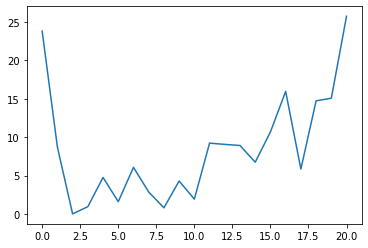

In [314]:
tr_pre_popup = 2
wass_d_l = {}
for tr_post_popup in frmap_oneuid.columns:
    wass_d=scipy.stats.wasserstein_distance(frmap_oneuid.index,frmap_oneuid.index,u_weights=frmap_oneuid.loc[:,tr_pre_popup],
                                 v_weights=frmap_oneuid.loc[:,tr_post_popup])
    wass_d_l[tr_post_popup] = wass_d
wass_d_l = pd.Series(wass_d_l)
wass_d_l.plot()

In [299]:

scipy.stats.pearsonr(frmap_oneuid.loc[:,2],frmap_oneuid.loc[:,9])

PearsonRResult(statistic=0.9254364574035843, pvalue=1.14171725051465e-42)

Text(0.5, 1.0, 'place field width')

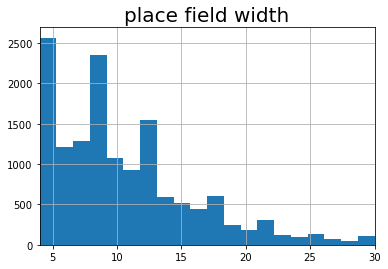

In [130]:
width=all_fields_recombined_all['end']-all_fields_recombined_all['start']
width = width.astype(float).dropna()
ax=(width).hist(bins=20)
plt.xlim([4,30])
ax.set_title('place field width')

1.6860843830553431 0.5449264473094236 2.384510797172963


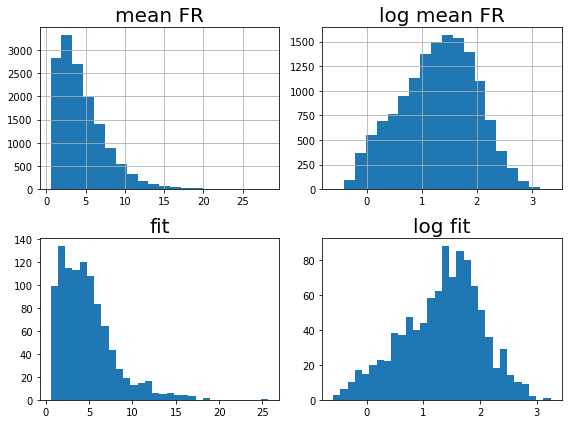

In [142]:
fig,axs=plt.subplots(2,2,figsize=(8,6))
eps=1e-10
fr=all_fields_recombined_all['fr_mean'].astype('float').dropna()
ax=axs[0,0]
ax=fr.hist(bins=20,ax=ax)
ax.set_title('mean FR')
ax=axs[0,1]
np.log(all_fields_recombined_all['fr_mean'].astype('float').dropna()+eps).hist(bins=20,ax=ax)
ax.set_title('log mean FR')


fit_a,fit_loc,fit_b=scipy.stats.gamma.fit(fr)
print(fit_a,fit_loc,fit_b)
fit_sample=scipy.stats.gamma.rvs(fit_a,loc=fit_loc,scale=fit_b,size=1000)
ax=axs[1,0]
_=ax.hist(fit_sample,bins=30)
ax.set_title('fit')
ax=axs[1,1]
_=ax.hist(np.log(fit_sample+eps),bins=30)
ax.set_title('log fit')
# plt.xlim([4,30])
plt.tight_layout()

Text(0.5, 1.0, 'log')

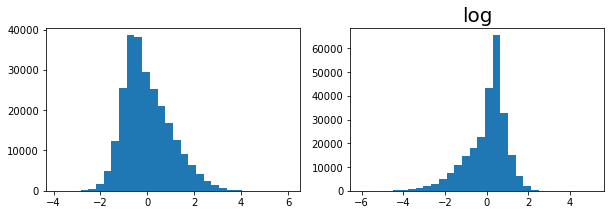

In [157]:
fr_mean_all=pf_params_all.loc[(slice(None),slice(None),slice(None),slice(None),'fr_mean'),:]
fr_mean_zscore=scipy.stats.zscore(fr_mean_all,axis=1,nan_policy='omit')
eps=1e-10
log_fr_mean_zscore=scipy.stats.zscore(np.log(fr_mean_all+eps),axis=1,nan_policy='omit')
fig,axs=plt.subplots(1,2,figsize=(10,3))
ax=axs[0]
ax.hist(fr_mean_zscore.values.flatten(),bins=30)
ax=axs[1]
ax.hist(log_fr_mean_zscore.values.flatten(),bins=30)
ax.set_title('log')



log cv mean 0.5202096672936729 log cv std 0.5584699805053144


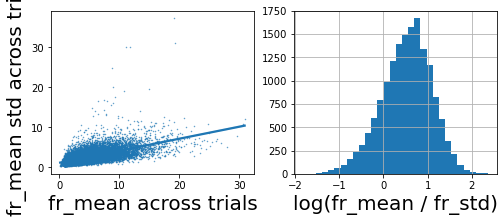

In [205]:
fr_mean_std_all=fr_mean_all.std(axis=1)
fr_mean_mean_all=fr_mean_all.mean(axis=1)
fr_mean_cv_all = fr_mean_mean_all /  fr_mean_std_all
fig,axs=plt.subplots(1,2,figsize=(8,3))
ax=axs[0]
ax=sns.regplot(fr_mean_mean_all,fr_mean_std_all,scatter_kws={'s':0.2},ax=ax)
ax.set(xlabel='fr_mean across trials',ylabel='fr_mean std across trials')
ax=axs[1]
log_fr_mean_cv_all=np.log(fr_mean_cv_all)
log_fr_mean_cv_all.hist(ax=ax,bins=30)
ax.set(xlabel='log(fr_mean / fr_std)')
print('log cv mean', log_fr_mean_cv_all.mean(),'log cv std', log_fr_mean_cv_all.std())


(array([4.153e+03, 6.673e+03, 3.295e+03, 1.107e+03, 3.480e+02, 1.060e+02,
        2.200e+01, 5.000e+00, 7.000e+00, 3.000e+00]),
 array([ 0.16441084,  1.21395547,  2.2635001 ,  3.31304472,  4.36258935,
         5.41213398,  6.46167861,  7.51122323,  8.56076786,  9.61031249,
        10.65985712]),
 <BarContainer object of 10 artists>)

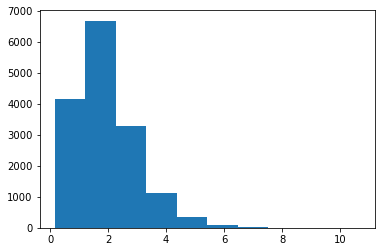

In [203]:
plt.hist(fr_mean_cv_all)

0.8484271227647034 3.9999999999999996 6.5788776343264495


(4.0, 30.0)

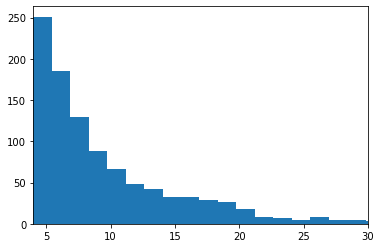

In [94]:
fit_a,fit_loc,fit_b=scipy.stats.gamma.fit(width)
print(fit_a,fit_loc,fit_b)
fit_sample=scipy.stats.gamma.rvs(fit_a,loc=fit_loc,scale=fit_b,size=1000)
plt.hist(fit_sample,bins=30)
plt.xlim([4,30])